In [2]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=2ab4292e817947f9c1ea59e8317c98fea4b5b357efde8761c068936a7e6e3bca
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
! pip install findspark

In [4]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

In [5]:
df = spark.read.csv("/content/sample_data/marketing_campaign.csv", inferSchema = True, header = True)

In [6]:
df.show(10)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

In [7]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year_Birth: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Dt_Customer: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedC

In [8]:
missing_values = {col: df.filter(df[col].isNull()).count() for col in df.columns}
for col, count in missing_values.items():
  print(f" Missing values in '{col}': {count}")

 Missing values in 'ID': 0
 Missing values in 'Year_Birth': 0
 Missing values in 'Education': 0
 Missing values in 'Marital_Status': 0
 Missing values in 'Income': 24
 Missing values in 'Kidhome': 0
 Missing values in 'Teenhome': 0
 Missing values in 'Dt_Customer': 0
 Missing values in 'Recency': 0
 Missing values in 'MntWines': 0
 Missing values in 'MntFruits': 0
 Missing values in 'MntMeatProducts': 0
 Missing values in 'MntFishProducts': 0
 Missing values in 'MntSweetProducts': 0
 Missing values in 'MntGoldProds': 0
 Missing values in 'NumDealsPurchases': 0
 Missing values in 'NumWebPurchases': 0
 Missing values in 'NumCatalogPurchases': 0
 Missing values in 'NumStorePurchases': 0
 Missing values in 'NumWebVisitsMonth': 0
 Missing values in 'AcceptedCmp3': 0
 Missing values in 'AcceptedCmp4': 0
 Missing values in 'AcceptedCmp5': 0
 Missing values in 'AcceptedCmp1': 0
 Missing values in 'AcceptedCmp2': 0
 Missing values in 'Complain': 0
 Missing values in 'Z_CostContact': 0
 Missing 

In [9]:
from pyspark.sql.functions import mean, when, col

mean_income = df.select(mean('Income')).collect()[0][0]
df = df.withColumn('Income', when(col('Income').isNull(), mean_income).otherwise(col('Income')))

In [10]:
from pyspark.sql import functions as F

In [11]:
avg_store_purchases_by_marital_status = df.groupBy('Marital_Status').agg(F.avg('NumStorePurchases').alias('Average store purchases'))
avg_store_purchases_by_marital_status.show()

+--------------+-----------------------+
|Marital_Status|Average store purchases|
+--------------+-----------------------+
|          YOLO|                    6.0|
|      Together|     5.7362068965517246|
|       Married|      5.850694444444445|
|        Absurd|                    6.5|
|         Widow|      6.415584415584416|
|      Divorced|      5.818965517241379|
|         Alone|                    4.0|
|        Single|      5.639583333333333|
+--------------+-----------------------+



In [12]:
# filter customers who accepted the first campaign

accepted_cmp1_customers = df.filter(df['AcceptedCmp1']==1)
accepted_cmp1_customers.show()

+-----+----------+----------+--------------+-----------------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|   ID|Year_Birth| Education|Marital_Status|           Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+-----+----------+----------+--------------+-----------------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+----------

In [13]:
# calculate total income by marital status

income_by_marital_status = df.groupBy('Marital_Status').sum('Income')
income_by_marital_status.show()

+--------------+--------------------+
|Marital_Status|         sum(Income)|
+--------------+--------------------+
|          YOLO|             96864.0|
|      Together|3.0875421759476528E7|
|       Married|4.4694037759476535E7|
|        Absurd|            144731.0|
|         Widow|   4344845.251353791|
|      Divorced|         1.2257541E7|
|         Alone|            131367.0|
|        Single|2.4489035262184113E7|
+--------------+--------------------+



In [ ]:
# Descriptive statistics

df.describe().show()

In [ ]:
# Correlation analysis

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [ ]:
# Select relevant numeric columns

numeric_cols = ["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
assembler = VectorAssembler(inputCols = numeric_cols, outputCol = 'features')
df_numeric = assembler.transform(df).select('features')

In [ ]:
# Calculate correlation matrix

correlation_matrix = Correlation.corr(df_numeric, 'features').head()
print('Correlation matrix:\n', correlation_matrix)

In [ ]:
ed_level = df.groupBy('Education').agg(
    F.sum(when(col('AcceptedCmp1')>0, 1).otherwise(0)).alias('Total people who accepted the 1st campaign'),
    F.avg('NumWebPurchases').alias('Average web purchases')
)
ed_level.show()

In [30]:
import matplotlib.pyplot as plt

In [31]:
# Convert Spark DataFrame to Pandas for visualization

income_distribution = df.select('Income').toPandas()

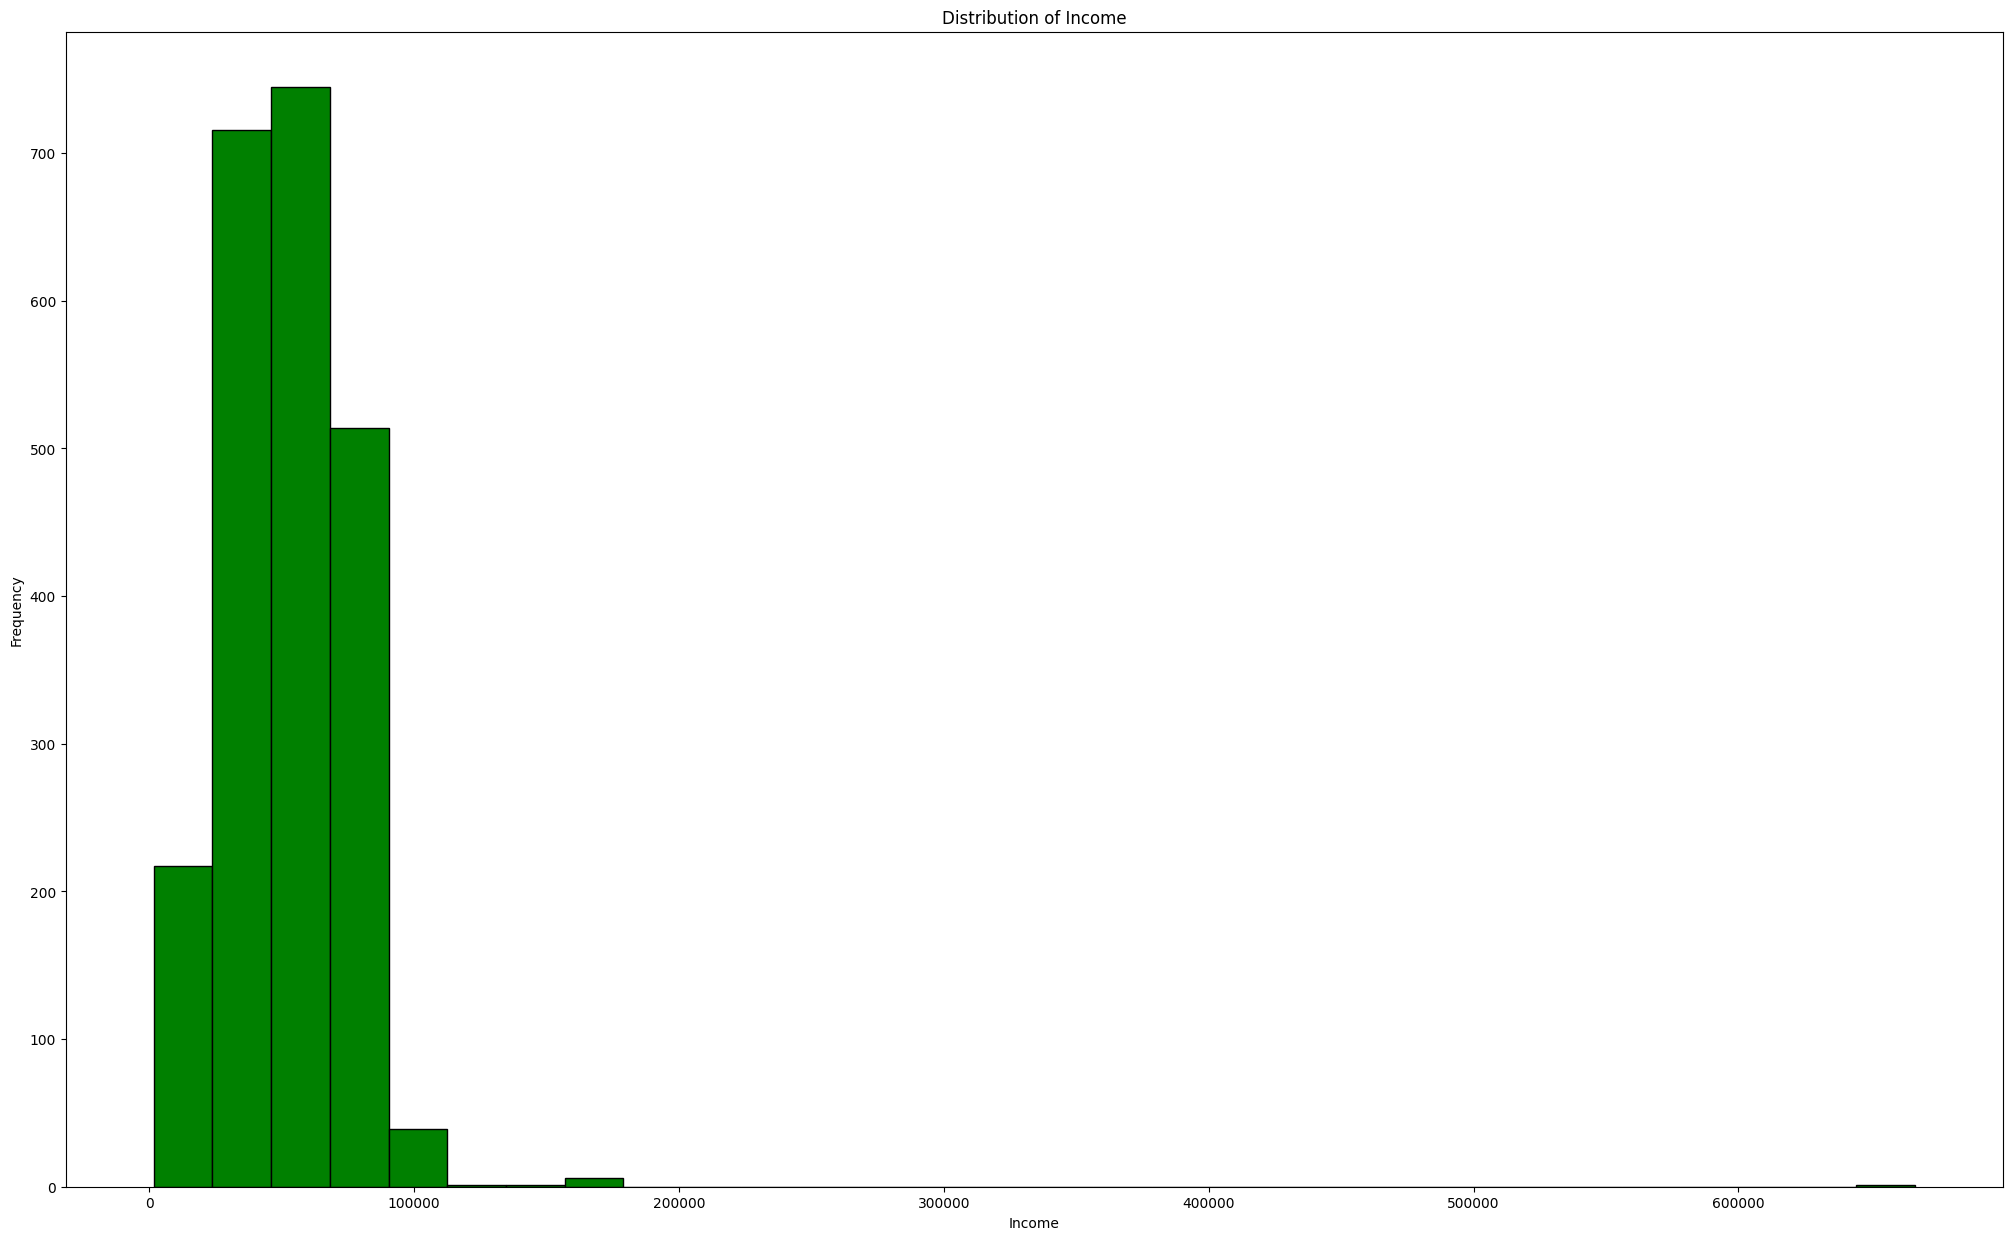

In [32]:
# Plot histogram

plt.figure(figsize=(25,15))
plt.hist(income_distribution['Income'], bins = 30, color = 'green', edgecolor = 'black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create a new column 'LogLoanAmount' that contains the logarithm (base 15) of the 'Income'

from pyspark.sql.functions import log10

df = df.withColumn('Log Income Amount', log10('Income'))
df.select('ID', 'Income', 'Log Income Amount').show()

In [ ]:
from pyspark.sql.functions import col

In [ ]:
# Calculate average 'number of catalog purchases' for each 'Marital Status'

avg_cat_purch_by_marital_status = df.groupBy('Marital_Status').agg(F.avg('NumCatalogPurchases').alias('Average purchases'))

# Filter results for average 'catalog purchases' greater than 7

filtered_results = avg_cat_purch_by_marital_status.filter(col('Average purchases') > 7)
filtered_results.show()

In [ ]:
# Filter the DataFrame based on a complex condition

filtered_data = df.filter((col('Year_Birth') > 1950) & (col('MntFishProducts').between(50, 200)))
filtered_data.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
# Define categorical columns to be indexed
categorical_columns = ["Marital_Status"]

# Apply StringIndexer to each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in categorical_columns]



In [ ]:
# Apply the transformations to the DataFrame

for indexer in indexers:
  df = indexer.transform(df)

In [ ]:
df.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# Select relevant columns for modeling

model_data = df.select('Marital_Status_index', 'MntMeatProducts', 'Income' )

In [ ]:
# Handle missing values

model_data = model_data.na.drop()

In [ ]:
# Create a feature vector

assembler = VectorAssembler(inputCols = ['Marital_Status_index', 'Income'], outputCol = 'features')
model_data = assembler.transform(model_data)

In [ ]:
model_data.show()

In [ ]:
# Split the data into training and testing sets

train_data, test_data = model_data.randomSplit([0.9, 0.1], seed = 40)

In [ ]:
# Train a linear regression model

lr = LinearRegression(featuresCol = 'features', labelCol = 'MntMeatProducts')
model = lr.fit(train_data)

In [ ]:
# Evaluate the model on the testing set

pred = model.transform(test_data)
evaluator = RegressionEvaluator(labelCol = 'MntMeatProducts', predictionCol = 'prediction', metricName = 'rmse')
rmse = evaluator.evaluate(pred)

In [ ]:
# Display regression coefficients

print(f"Regression Coefficients: {model.coefficients}")
print(f"Root Mean Squared Error: {rmse} ")

In [ ]:
# Customer segmentation using K-means clustering


In [16]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

In [24]:
# Select relevant features for clustering

feature_cols = ['Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

df_features = assembler.transform(df).select('features')

In [19]:
# Train K-means clustering model

kmeans = KMeans(k=6, seed = 1)
model= kmeans.fit(df_features.select('features'))

In [20]:
# Make predictions

pred = model.transform(df_features)

In [21]:
# Evaluate clustering performance

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred)
print(" Silhouette score: ", silhouette)

 Silhouette score:  0.6562859035939281


In [22]:
# Show cluster centers

print("Cluster centers:")
centers = model.clusterCenters()
for center in centers:
  print(center)

Cluster centers:
[48.91652893 57.71900826  8.6785124  34.93719008 11.71157025  8.81239669
 20.99008264  2.22809917  2.56694215  0.75950413  3.64628099  6.27933884]
[  52.09333333 1067.09333333   62.56        664.85333333   92.93333333
   65.36         75.01333333    1.10666667    5.58666667    6.08
    8.38666667    2.92      ]
[ 47.95642702 434.77995643  33.30936819 148.18082789  48.14814815
  36.45533769  65.55555556   3.24400871   6.416122     3.67320261
   8.14379085   4.98039216]
[ 49.23376623 308.18831169  68.53896104 533.80519481 103.71428571
  67.74675325  86.           1.61688312   4.54545455   6.22077922
   8.09090909   2.38961039]
[ 49.69430052 965.48186528  36.55958549 214.44559585  50.54404145
  36.80829016  72.07253886   2.61139896   6.1761658    5.18134715
   8.85492228   5.27979275]
[ 51.83892617 654.90604027  72.6442953  605.51006711 101.26845638
  72.38926174  69.40268456   1.25503356   5.2885906    6.33557047
   8.29530201   2.81208054]


In [23]:
import matplotlib.pyplot as plt

In [25]:
# Convert Spark DataFrame to Pandas DataFrame for plotting

pred_df = pred.select('features').toPandas()
pred_df['prediction'] = pred.select('prediction').toPandas()

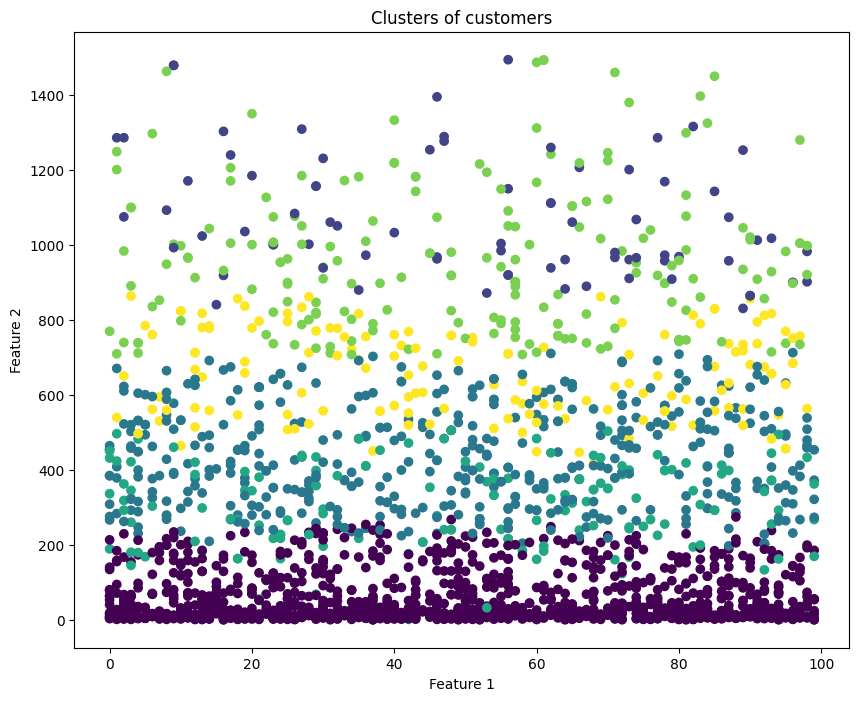

In [28]:
# Plot clusters

plt.figure(figsize = (10,8))
plt.scatter(pred_df['features'].apply(lambda x: x[0]), pred_df['features'].apply(lambda x: x[1]), c = pred_df['prediction'], cmap = 'viridis')
plt.title('Clusters of customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()